In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,make_scorer
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

In [2]:
# Load data
df = pd.read_excel('dataCampuran.xlsx')
df

,Unnamed: 0,ProductName,Category,product_lower,product_punctuation,product_tokenized,no_stopwords
0,0,1 pack benih rumput kucing cat grass seeds 50 ...,1,1 pack benih rumput kucing cat grass seeds 50 ...,pack benih rumput kucing cat grass seeds s s...,"['pack', 'benih', 'rumput', 'kucing', 'cat', '...","['benih', 'rumput', 'kucing', 'cat', 'grass', ..."
1,1,1 pack biji cherry tomato mix color yellow red,1,1 pack biji cherry tomato mix color yellow red,pack biji cherry tomato mix color yellow red,"['pack', 'biji', 'cherry', 'tomato', 'mix', 'c...","['biji', 'cherry', 'tomato', 'mix', 'color', '..."
2,2,1 pack biji maica leaf benih pacar air impatie...,1,1 pack biji maica leaf benih pacar air impatie...,pack biji maica leaf benih pacar air impatien...,"['pack', 'biji', 'maica', 'leaf', 'benih', 'pa...","['biji', 'maica', 'leaf', 'benih', 'pacar', 'a..."
3,3,1 pack biji tanaman bunga tulip mix color maic...,1,1 pack biji tanaman bunga tulip mix color maic...,pack biji tanaman bunga tulip mix color maica...,"['pack', 'biji', 'tanaman', 'bunga', 'tulip', ...","['biji', 'tanaman', 'bunga', 'tulip', 'mix', '..."
4,4,1 pack biji tanaman parsley peterseli maica le...,1,1 pack biji tanaman parsley peterseli maica le...,pack biji tanaman parsley peterseli maica lea...,"['pack', 'biji', 'tanaman', 'parsley', 'peters...","['biji', 'tanaman', 'parsley', 'peterseli', 'm..."
...,...,...,...,...,...,...,...
31374,32927,sarung bantal cinta katun renda rumbai sarung ...,27,sarung bantal cinta katun renda rumbai sarung ...,sarung bantal cinta katun renda rumbai sarung ...,"['sarung', 'bantal', 'cinta', 'katun', 'renda'...","['sarung', 'bantal', 'cinta', 'katun', 'renda'..."
31375,32928,shafiyyah.sarban sarung bantal lantai 70x70 ed...,27,shafiyyah.sarban sarung bantal lantai 70x70 ed...,shafiyyahsarban sarung bantal lantai x edisi ii,"['shafiyyahsarban', 'sarung', 'bantal', 'lanta...","['shafiyyahsarban', 'sarung', 'bantal', 'lanta..."
31376,32929,bantal boneka 5 in 1 motif doraemon warna biru...,27,bantal boneka 5 in 1 motif doraemon warna biru...,bantal boneka in motif doraemon warna biru ...,"['bantal', 'boneka', 'in', 'motif', 'doraemon'...","['bantal', 'boneka', 'motif', 'doraemon', 'war..."
31377,32930,bantal leher jok mobil plus sarung belt klub b...,27,bantal leher jok mobil plus sarung belt klub b...,bantal leher jok mobil plus sarung belt klub b...,"['bantal', 'leher', 'jok', 'mobil', 'plus', 's...","['bantal', 'leher', 'jok', 'mobil', 'plus', 's..."


In [3]:
X = df.iloc[:,6]
y = df.iloc[:,2]

In [4]:
# Split data menjadi train, test, dan validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Feature extraction
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_val = vectorizer.transform(X_val)

In [6]:
# Oversampling menggunakan SMOTE pada train set
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Random Forest

In [7]:
param_grid = {
    'n_estimators': [200, 500],  # Number of trees in the forest
    'max_depth': [5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced','balanced_subsample']
}

In [8]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)

In [9]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
CV_rfc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500]})

In [10]:
CV_rfc.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [11]:
pred_val=CV_rfc.predict(X_val)

In [12]:
print("Accuracy for Random Forest on Val data: ",accuracy_score(y_val,pred_val))
print("F1_Score for Random Forest on Val data: ",f1_score(y_val, pred_val, average='weighted'))
print("precision_Score for Random Forest on Val data: ",precision_score(y_val, pred_val, average='weighted'))
print("recall_Score for Random Forest on Val data: " ,recall_score(y_val, pred_val,average='weighted'))

Accuracy for Random Forest on Val data:  0.7307309300936069
F1_Score for Random Forest on Val data:  0.7385435752953676
precision_Score for Random Forest on Val data:  0.7949855817961079
recall_Score for Random Forest on Val data:  0.7307309300936069


In [13]:
pred_test=CV_rfc.predict(X_test)

In [14]:
# Evaluate model performance
accuracy_test = accuracy_score(y_test, pred_test)
precision_test = precision_score(y_test, pred_test, average='weighted')
recall_test = recall_score(y_test, pred_test, average='weighted')
f1_test = f1_score(y_test, pred_test, average='weighted')

print("Akurasi_test : ",accuracy_test)
print("precision_test : ",precision_test)
print("recall_test : ", recall_test)
print("f1score_test : ",f1_test)

Akurasi_test :  0.7418738049713193
precision_test :  0.7983767286226008
recall_test :  0.7418738049713193
f1score_test :  0.7502965430245222


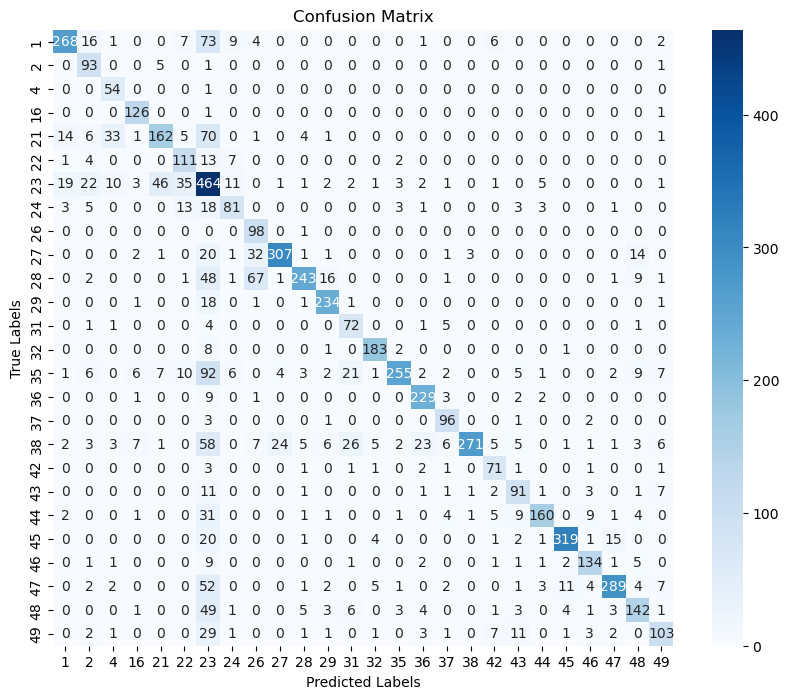

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
labels = np.unique(y_test)
cm = confusion_matrix(y_test, pred_test, labels=labels)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels = labels, yticklabels= labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# SVM

In [16]:
#SVM
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [1, 0.1, 0.01]  # Kernel coefficient
}
grid = GridSearchCV(SVC(class_weight='balanced',random_state=42), param_grid, cv=10)
grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']})

In [17]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [18]:
grid_predictions_val = grid.predict(X_val)

In [19]:
print("Accuacy_Score for SVM on CV data: " ,accuracy_score(y_val, grid_predictions_val))
print("f1_score for SVM on CV data : " ,f1_score(y_val, grid_predictions_val,average='weighted'))
print("precision_score for SVM on CV data : " ,precision_score(y_val, grid_predictions_val,average='weighted'))
print("recall_score for SVM on CV data : " ,recall_score(y_val, grid_predictions_val,average='weighted'))

Accuacy_Score for SVM on CV data:  0.9516032662816172
f1_score for SVM on CV data :  0.9516278630215234
precision_score for SVM on CV data :  0.9521750976582473
recall_score for SVM on CV data :  0.9516032662816172


In [20]:
grid_predictions_test = grid.predict(X_test)

In [21]:
print("Accuacy_Score for SVM Test data: " ,accuracy_score(y_test, grid_predictions_test))
print("f1_score for SVM on Test data : " ,f1_score(y_test, grid_predictions_test,average='weighted'))
print("precision_score for SVM Test data : " ,precision_score(y_test, grid_predictions_test,average='weighted'))
print("recall_score for SVM Test data : " ,recall_score(y_test, grid_predictions_test,average='weighted'))

Accuacy_Score for SVM Test data:  0.9550669216061185
f1_score for SVM on Test data :  0.9549958175611692
precision_score for SVM Test data :  0.9554460715780465
recall_score for SVM Test data :  0.9550669216061185


In [22]:
print(classification_report(y_test, grid_predictions_test))

              precision    recall  f1-score   support

           1       0.96      0.95      0.95       387
           2       0.90      0.94      0.92       100
           4       0.98      0.96      0.97        55
          16       0.99      0.98      0.98       128
          21       0.92      0.93      0.92       298
          22       0.92      0.92      0.92       138
          23       0.91      0.97      0.93       630
          24       0.92      0.83      0.88       131
          26       0.92      0.93      0.92        99
          27       0.99      0.97      0.98       383
          28       0.96      0.98      0.97       391
          29       0.98      0.97      0.97       257
          31       0.94      0.93      0.93        85
          32       0.97      0.98      0.97       195
          35       0.96      0.97      0.96       442
          36       0.97      0.98      0.97       247
          37       0.96      0.96      0.96       103
          38       0.99    

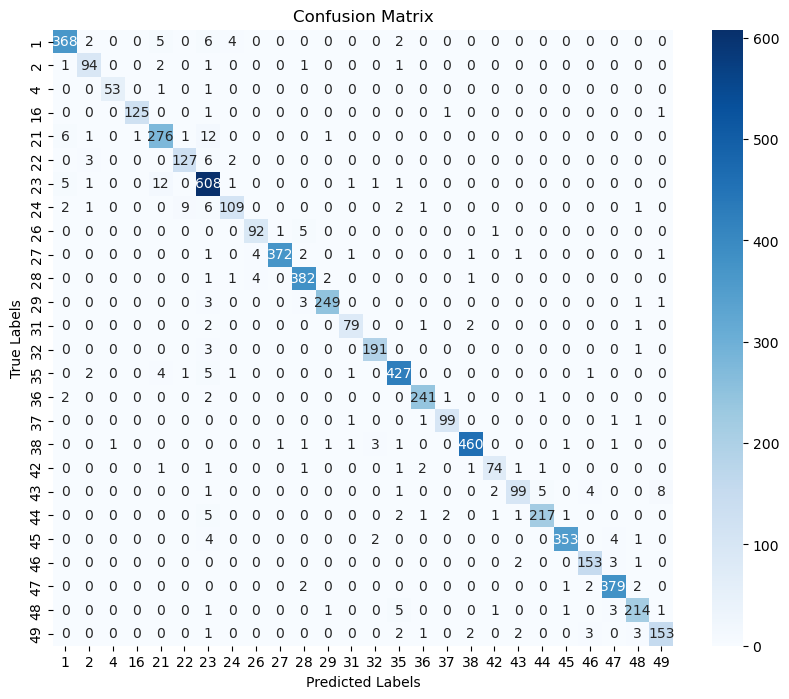

In [23]:
# Create confusion matrix
cm2 = confusion_matrix(y_test, grid_predictions_test)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', xticklabels = labels, yticklabels= labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [24]:
# from sklearn.model_selection import cross_val_score
# f1_scorer = make_scorer(f1_score, average='weighted')
# scores = cross_val_score(grid, X_train, y_train, cv=10, scoring=f1_scorer)
# print('F1 scores for each fold:')
# print(scores)

# Multinomial Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb = MultinomialNB()

# melatih model
nb.fit(X_train, y_train)

# menguji model
y_pred = nb.predict(X_test)

# menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       387
           2       0.99      0.72      0.83       100
           4       1.00      0.71      0.83        55
          16       1.00      0.93      0.96       128
          21       0.96      0.74      0.84       298
          22       0.98      0.70      0.81       138
          23       0.72      0.99      0.83       630
          24       0.98      0.61      0.75       131
          26       0.98      0.55      0.70        99
          27       0.88      0.98      0.93       383
          28       0.86      0.97      0.91       391
          29       0.95      0.95      0.95       257
          31       1.00      0.42      0.60        85
          32       0.98      0.92      0.95       195
          35       0.89      0.96      0.93       442
          36       0.92      0.93      0.92       247
          37       1.00      0.59      0.74       103
          38       0.79    

In [27]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],'fit_prior': [True, False]}

# Create GridCV object and fit to data
gridcv = GridSearchCV(MultinomialNB(), param_grid, cv=10)
gridcv.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'fit_prior': [True, False]})

In [28]:
# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", gridcv.best_params_)

Best hyperparameters:  {'alpha': 0.01, 'fit_prior': True}


In [29]:
pred_val=gridcv.predict(X_test)

In [30]:
print("Accuacy_Score for SVM Test data: " ,accuracy_score(y_test, pred_val))
print("f1_score for SVM on Test data : " ,f1_score(y_test, pred_val,average='weighted'))
print("precision_score for SVM Test data : " ,precision_score(y_test, pred_val,average='weighted'))
print("recall_score for SVM Test data : " ,recall_score(y_test, pred_val,average='weighted'))

Accuacy_Score for SVM Test data:  0.9238368387507967
f1_score for SVM on Test data :  0.9238142675056915
precision_score for SVM Test data :  0.9241791267513016
recall_score for SVM Test data :  0.9238368387507967


In [31]:
# from sklearn.model_selection import cross_val_score
# f1_scorer = make_scorer(f1_score, average='weighted')
# scores = cross_val_score(gridcv, X_test, y_test, cv=10, scoring=f1_scorer)
# print('F1 scores for each fold:')
# print(scores)